In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
import missingno as msno
import seaborn as sns
import numpy as np
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from geopy.point import Point
import cufflinks as cf
from IPython.display import display,HTML

cf.set_config_file(sharing='public', theme='white', offline=True)



In [147]:
df = pd.read_csv('sismos_japon.csv')

In [148]:
df.head()

,地震の発生日,地震の発生時刻,震央地名,緯度,経度,深さ,Ｍ,最大震度
0,2011/03/11,14:46:18.1,三陸沖,38°06.2′N,142°51.6′E,24 km,9.0,震度７
1,2013/05/24,14:44:48.9,オホーツク海,54°53.5′N,153°13.2′E,598 km,8.3,震度３
2,2007/01/13,13:23:13.0,千島列島東方,46°56.2′N,155°03.1′E,30 km,8.2,震度３
3,1994/10/04,22:22:56.9,北海道東方沖,43°22.5′N,147°40.4′E,28 km,8.2,震度６
4,2015/05/30,20:23:02.2,小笠原諸島西方沖,27°51.6′N,140°40.9′E,682 km,8.1,震度５強


In [149]:
df = df.rename(columns={'地震の発生日': 'fecha',
                        '地震の発生時刻': 'hora ',
                        '震央地名': 'epicentro',
                        '緯度': 'latitud',
                        '経度': 'longitud',
                        '深さ': 'profundidad (km)',
                        'Ｍ' : 'magnitud (M)',
                        '最大震度': 'máxima intensidad sísmica'})


In [150]:
df.head()

,fecha,hora,epicentro,latitud,longitud,profundidad (km),magnitud (M),máxima intensidad sísmica
0,2011/03/11,14:46:18.1,三陸沖,38°06.2′N,142°51.6′E,24 km,9.0,震度７
1,2013/05/24,14:44:48.9,オホーツク海,54°53.5′N,153°13.2′E,598 km,8.3,震度３
2,2007/01/13,13:23:13.0,千島列島東方,46°56.2′N,155°03.1′E,30 km,8.2,震度３
3,1994/10/04,22:22:56.9,北海道東方沖,43°22.5′N,147°40.4′E,28 km,8.2,震度６
4,2015/05/30,20:23:02.2,小笠原諸島西方沖,27°51.6′N,140°40.9′E,682 km,8.1,震度５強


In [151]:

df['máxima intensidad sísmica'] = df['máxima intensidad sísmica'].replace({'震度７': 'Intensidad sísmica 7',
                                          '震度３': 'Intensidad sísmica 3',
                                          '震度６': 'Intensidad sísmica 6',
                                          '震度５強': 'Intensidad sísmica 5 fuerte',
                                          '震度４': 'Intensidad sísmica 4',
                                          '震度６弱': 'Intensidad sísmica 6 débil',
                                          '震度２': 'Intensidad sísmica 2',
                                          '震度５': 'Intensidad sísmica 5',
                                          '震度１': 'Intensidad sísmica 1',
                                          '震度６強': 'Intensidad sísmica 6 fuerte',
                                          '震度５弱': 'Intensidad sísmica 5 débil',})


In [152]:
df.head()

,fecha,hora,epicentro,latitud,longitud,profundidad (km),magnitud (M),máxima intensidad sísmica
0,2011/03/11,14:46:18.1,三陸沖,38°06.2′N,142°51.6′E,24 km,9.0,Intensidad sísmica 7
1,2013/05/24,14:44:48.9,オホーツク海,54°53.5′N,153°13.2′E,598 km,8.3,Intensidad sísmica 3
2,2007/01/13,13:23:13.0,千島列島東方,46°56.2′N,155°03.1′E,30 km,8.2,Intensidad sísmica 3
3,1994/10/04,22:22:56.9,北海道東方沖,43°22.5′N,147°40.4′E,28 km,8.2,Intensidad sísmica 6
4,2015/05/30,20:23:02.2,小笠原諸島西方沖,27°51.6′N,140°40.9′E,682 km,8.1,Intensidad sísmica 5 fuerte


In [153]:
traducciones = {
    '三陸沖': 'Fuera de Sanriku',
'オホーツク海': 'Mar de Ojotsk',
'千島列島東方': 'Este de las islas Kuriles',
'北海道東方沖': 'Este de Hokkaido',
'小笠原諸島西方沖': 'Oeste de las islas Ogasawara',
'択捉島南東沖': 'Sureste de la isla Etorofu',
'十勝沖': 'Fuera de Tokachi',
'硫黄島近海': 'Frente a la costa de Iwo Jima',
'青森県東方沖': 'Frente al este de la prefectura de Aomori',
'父島近海': 'Frente a la costa de Chichijima',
'マリアナ諸島': 'Islas Marianas',
'北海道南西沖': 'Frente a la costa suroeste de Hokkaido',
'台湾付近': 'Cerca de Taiwán',
'石垣島南方沖': 'Frente al sur de Isla Ishigaki',
'秋田県沖': 'Afuera de la prefectura de Akita',
'茨城県沖': 'Afuera de la prefectura de Ibaraki',
'鳥島近海': 'Mar cerca de Torishima',
'北西太平洋': 'Océano Pacífico noroccidental',
'釧路沖': 'Afuera de Kushiro',
'中国東北部': 'Noreste de China',
'日向灘': 'Hyuganada',
'新潟県下越沖': 'Afuera de la prefectura de Shimoetsu Niigata',
'福島県沖': 'Afuera de la prefectura de Fukushima',
'岩手県沖': 'Afuera de la prefectura de Iwate',
'三重県南東沖': 'Sureste de la prefectura de Mie',
'サハリン南部付近': 'Cerca del sur de Sakhalin',
'宮城県沖': 'Afuera de la prefectura de Miyagi',
'根室半島南東沖': 'Afuera del sureste de la península de Nemuro',
'インドネシア付近': 'Cerca de Indonesia',
'熊本県熊本地方': 'Región de Kumamoto de la prefectura de Kumamoto',
'オホーツク海南部': 'Mar del Sur de Okhotsk',
'与那国島近海': 'Mar cerca de la isla de Yonaguni',
'鳥取県西部': 'Prefectura de Tottori occidental',
'大阪湾': 'Bahía de Osaka',
'日本海北部': 'Mar del Norte de Japón',
'日本海西部': 'Mar de Japón Occidental',
'ウラジオストク付近': 'Cerca de Vladivostok',
'カムチャツカ半島付近': 'Cerca de la península de Kamchatka',
'沖縄本島近海': 'Mar cerca de la isla principal de Okinawa',
'岩手県内陸南部': 'Zona interior sur de la prefectura de Iwate',
'千島列島': 'Islas Killil',
'択捉島付近': 'Cerca de la isla de Etorofu',
'東海道南方沖': 'Al sur de Tokaido frente a la costa',
'八丈島東方沖': 'Al este de la isla de Hachijo',
'薩摩半島西方沖': 'Al oeste de la península de Satsuma',
'青森県西方沖': 'Al oeste de la prefectura de Aomori',
'浦河沖': 'A la altura de Urakawa',
'沖縄本島北西沖': 'Noroeste de la isla principal de Okinawa',
'福島県浜通り': 'Hamadori en la prefectura de Fukushima',
'福岡県北西沖': 'Noroeste de la prefectura de Fukuoka',
'石垣島近海': 'Mar cerca de la isla de Ishigaki',
'伊豆大島近海': 'Mar cerca de Izu Oshima',
'石川県加賀地方': 'Región de Kaga en la prefectura de Ishikawa',
'能登半島沖': 'Afuera de la península de Noto',
'奄美大島近海': 'Afuera de la costa de Amami Oshima',
'駿河湾': 'Bahía de Suruga',
'サハリン西方沖': 'Al oeste de Sakhalin',
'若狭湾': 'Bahía de Wakasa',
'奄美大島北東沖': 'Noreste de Amami Oshima',
'岩手県沿岸北部': 'Costa norte de la prefectura de Iwate',
'新潟県上中越沖': 'Fuera de Jochuetsu, Prefectura de Niigata',
'関東東方沖': 'Este de Kanto',
'新潟県中越地方': 'Chuetsu, Prefectura de Niigata',
'長野県南部': 'Prefectura de Nagano Sur',
'国後島付近': 'Cerca de la isla Kunashiri',
'朝鮮半島北部': 'Península de Corea del Norte',
'山形県沖': 'Fuera de la Prefectura de Yamagata',
'胆振地方中東部': 'Iburi de Oriente Medio',
'長野県北部': 'Prefectura del norte de Nagano',
'京都府沖': 'Prefectura de Kioto',
'宮古島北西沖': 'Marina del noroeste de la isla de Miyako',
'安芸灘': 'Akinada',
'千葉県東方沖': 'Marina del este de la prefectura de Chiba',
'伊豆半島東方沖': 'Marina del este de la península de Izu',
'十勝地方南部': 'Southern Tokachi',
'中国北東部': 'Northeast China',
'宗谷東方沖': 'Eastern off Soya',
'鳥取県中部': 'Central Tottori',
'フィリピン付近': 'Cerca de Filipinas',
'種子島近海': 'Tanegashima',
'山口県中部': 'Central Yamaguchi',
'鹿児島県薩摩地方': 'Región de Satsuma, prefectura de Kagoshima',
'日本海中部': 'Mar de Japón Central',
'大分県北部': 'Parte norte de la prefectura de Oita',
'本州南方沖': 'Sur de Honshu',
'奄美大島北西沖': 'Noroeste de Amami Oshima',
'千島列島南東沖': 'Sureste de las Islas Kuriles',
'岐阜県美濃中西部': 'Medio oeste de Mino, Prefectura de Gifu',
'豊後水道': 'Canal Bungo',
'種子島南東沖': 'Sureste frente a Tanegashima',
'宮古島近海': 'Isla Miyako',
'石垣島北西沖': 'Noroeste frente a la isla Ishigaki',
'小笠原諸島東方沖': 'Este frente a las islas Ogasawara',
'三宅島近海': 'Mar cerca de Miyakejima',
'新島・神津島近海': 'Mar cerca de Niijima y Kozushima',
'釧路地方北部': 'Región del norte de Kushiro',
'宮城県北部': 'Prefectura del norte de Miyagi',
'サハリン近海': 'Mar cerca de Sakhalin',
'福島県中通り': 'Nakadori en la prefectura de Fukushima',
'静岡県東部': 'Prefectura oriental de Shizuoka',
'南大東島近海': 'Mar cerca de la isla Minami Daito',
'宮城県中部': 'Prefectura central de Miyagi',
'千葉県南東沖': 'Prefectura costera sudoriental de Chiba',
'秋田県内陸北部': 'Prefectura norteña de Akita',
'大分県西部': 'Prefectura occidental de Oita',
'京都府南部': 'Prefectura meridional de Kioto',
'和歌山県南方沖': 'Al sur de la prefectura de Wakayama',
'茨城県北部': 'Prefectura del norte de Ibaraki',
'淡路島付近': 'Cerca de la isla de Awaji',
'栃木県北部': 'Prefectura del norte de Tochigi',
'上川地方中部': 'Distrito central de Kamikawa',
'釧路地方中南部': 'Distrito central y sur de Kushiro',
'苫小牧沖': 'Afuera de Tomakomai',
'北海道北西沖': 'Noroeste de la costa de Hokkaido',
'伊予灘': 'Iyonada',
'石川県西方沖': 'Oeste de la costa de la prefectura de Ishikawa',
'岩手県内陸北部': 'Área interior del norte de la prefectura de Iwate',
'沖縄本島南方沖': 'Marina del sur de la isla principal de Okinawa',
'秋田県内陸南部': 'Área interior del sur de la prefectura de Akita',
'トカラ列島近海': 'Cerca de las islas Tokara',
'大阪府北部': 'Prefectura del norte de Osaka',
'島根県西部': 'Prefectura del oeste de Shimane',
'千葉県北東部': 'Prefectura del noreste de Chiba',
'留萌地方南部': 'Distrito del sur de Rumoi',
'根室地方北部': 'Distrito del norte de Nemuro',
'渡島地方東部': 'Prefectura del este de Oshima',
'福井県嶺南': 'Prefectura de Reinan Fukui',
'上川地方南部': 'Prefectura del sur de Kamikawa',
'島根県東部': 'Prefectura del este de Shimane',
'熊本県阿蘇地方': 'Distrito de Aso de la prefectura de Kumamoto',
'遠州灘': 'Enshunada',
'埼玉県北部': 'Prefectura del norte de Saitama',
'宮崎県南部山沿い': 'Prefectura del sur de Miyazaki',
'静岡県中部': 'Prefectura central de Shizuoka',
'大隅半島東方沖': 'Este frente a la península de Osumi',
'北海道西方沖': 'Oeste frente a Hokkaido',
'千葉県北西部': 'Noroeste de Chiba',
'周防灘': 'Suonada'

}

In [154]:
df['epicentro'].replace(traducciones, inplace=True)

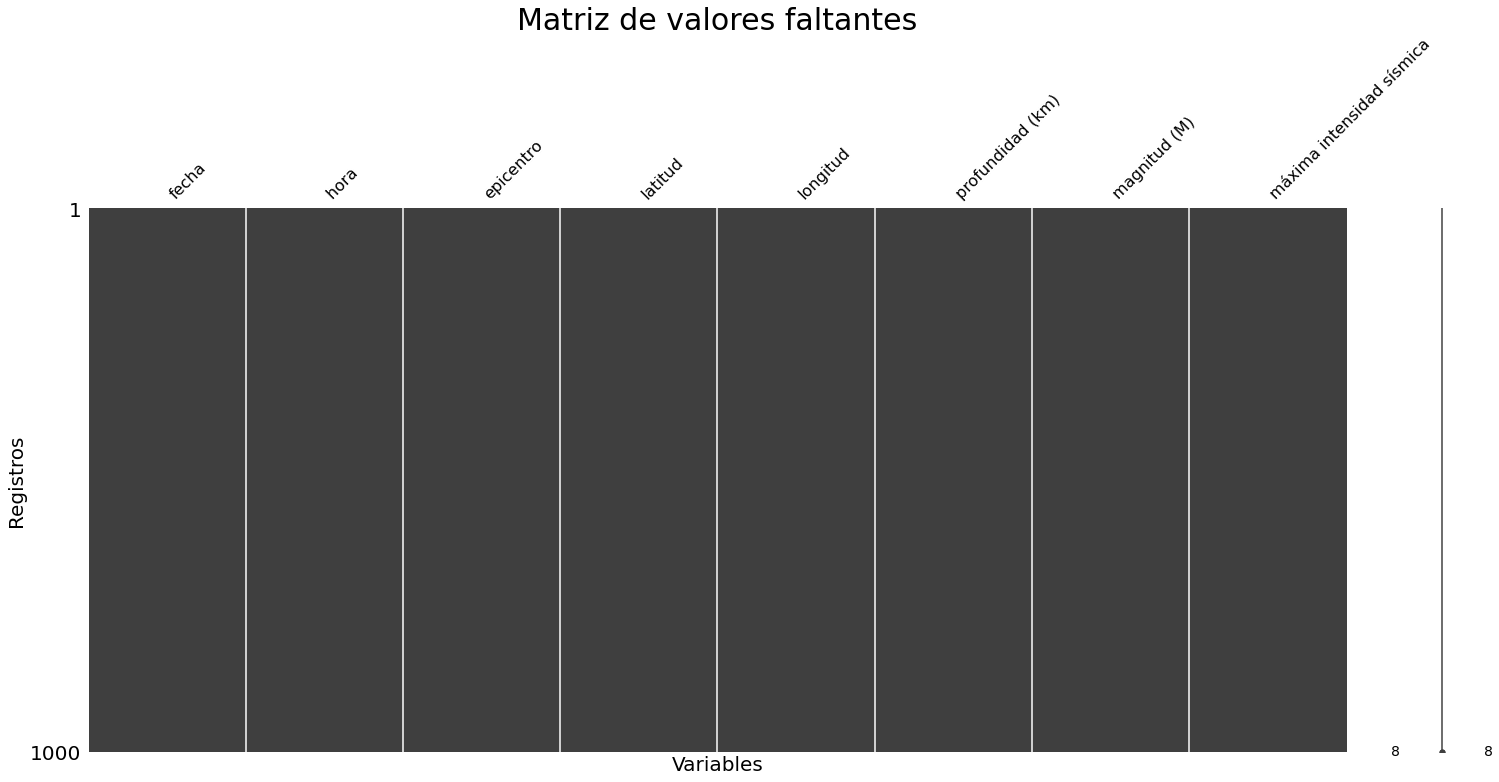

In [155]:
msno.matrix(df)
plt.title('Matriz de valores faltantes', fontsize=30)
plt.xlabel('Variables' , fontsize=20)
plt.ylabel('Registros' , fontsize=20)
plt.show()

In [156]:
df.head()

,fecha,hora,epicentro,latitud,longitud,profundidad (km),magnitud (M),máxima intensidad sísmica
0,2011/03/11,14:46:18.1,Fuera de Sanriku,38°06.2′N,142°51.6′E,24 km,9.0,Intensidad sísmica 7
1,2013/05/24,14:44:48.9,Mar de Ojotsk,54°53.5′N,153°13.2′E,598 km,8.3,Intensidad sísmica 3
2,2007/01/13,13:23:13.0,Este de las islas Kuriles,46°56.2′N,155°03.1′E,30 km,8.2,Intensidad sísmica 3
3,1994/10/04,22:22:56.9,Este de Hokkaido,43°22.5′N,147°40.4′E,28 km,8.2,Intensidad sísmica 6
4,2015/05/30,20:23:02.2,Oeste de las islas Ogasawara,27°51.6′N,140°40.9′E,682 km,8.1,Intensidad sísmica 5 fuerte


In [157]:
df['profundidad (km)'] = df['profundidad (km)'].replace('不明', np.nan)


In [158]:
df['profundidad (km)'] = df['profundidad (km)'].str.replace(' km', '').astype(float)

In [159]:
def int_lat_long(coord):
    int_coord, min_sec = coord.split('°')
    mins, secs = min_sec.split('.')
    secs = secs.replace('′N', '')
    secs = int(secs.replace('′E', ''))/600

    int_coord = int(int_coord)
    mins = int(mins)/60

    return int_coord + mins + secs

In [160]:
df['latitud'] = df['latitud'].apply(int_lat_long).astype(float)
df['longitud'] = df['longitud'].apply(int_lat_long).astype(float)

In [161]:
df.head()

,fecha,hora,epicentro,latitud,longitud,profundidad (km),magnitud (M),máxima intensidad sísmica
0,2011/03/11,14:46:18.1,Fuera de Sanriku,38.103333,142.860000,24.0,9.0,Intensidad sísmica 7
1,2013/05/24,14:44:48.9,Mar de Ojotsk,54.891667,153.220000,598.0,8.3,Intensidad sísmica 3
2,2007/01/13,13:23:13.0,Este de las islas Kuriles,46.936667,155.051667,30.0,8.2,Intensidad sísmica 3
3,1994/10/04,22:22:56.9,Este de Hokkaido,43.375000,147.673333,28.0,8.2,Intensidad sísmica 6
4,2015/05/30,20:23:02.2,Oeste de las islas Ogasawara,27.860000,140.681667,682.0,8.1,Intensidad sísmica 5 fuerte


In [162]:
geolocator = Nominatim(user_agent="test")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=2)

In [163]:
lald= "35.6895 ,139.6917"
lald

'35.6895 ,139.6917'

In [164]:
localizacion = geolocator.reverse(lald)
localizacion

Location(東京都庁, 都庁通り, 西新宿二丁目, 新宿区, 東京都, 163-8001, 日本, (35.6897391, 139.69299727216998, 0.0))

In [165]:
def combinar_coordenadas(row):
    latitud = row['latitud']
    longitud = row['longitud']
    coordenadas = f'{latitud},{longitud}'

    return coordenadas

# Aplica la función a cada fila del DataFrame y crea la nueva columna
df['coordenadas'] = df.apply(combinar_coordenadas, axis=1)

In [166]:
coordenadas = df['coordenadas'].to_list()
coordenadas

['38.10333333333333,142.85999999999999',
 '54.891666666666666,153.22',
 '46.93666666666666,155.05166666666668',
 '43.375,147.67333333333332',
 '27.860000000000003,140.68166666666664',
 '44.04833333333333,149.825',
 '41.77833333333333,144.07833333333332',
 '46.70166666666667,154.04666666666665',
 '22.55666666666667,144.035',
 '40.69833333333333,143.595',
 '27.051666666666666,143.935',
 '18.65,145.38166666666666',
 '42.781666666666666,139.17999999999998',
 '43.376666666666665,147.905',
 '18.834999999999997,145.75833333333333',
 '23.87666666666667,120.93',
 '22.378333333333334,125.43666666666667',
 '40.36,139.07333333333332',
 '36.12,141.25166666666667',
 '21.985,143.09666666666666',
 '40.43,143.74499999999998',
 '29.343333333333334,139.20166666666665',
 '48.985,157.69166666666666',
 '37.913333333333334,144.75',
 '42.919999999999995,144.35333333333332',
 '40.55,122.18333333333334',
 '22.521666666666665,122.37666666666667',
 '41.50333333333333,142.62666666666667',
 '32.44833333333333,132.4

In [167]:
ubicacion = []
for u in coordenadas:
    ubicacion.append(geolocator.reverse(u))

In [168]:
paises = []
departamentos = []
provincias = []
ciudades = []

for item in ubicacion:
    if item == None:
        paises.append('Japón')
        departamentos.append('Mar de Japón')
        provincias.append(None)
        ciudades.append(None)
    else:
        address = item.raw['address']

        paises.append(address.get('country'))
        departamentos.append(address.get('state'))
        provincias.append(address.get('region'))
        ciudades.append(address.get('city', address.get('village', address.get('town'))))

print(len(paises), len(departamentos), len(provincias), len(ciudades))

1000 1000 1000 1000


In [169]:
df['pais'] = paises
df['departamento'] = departamentos
df['provincia'] = provincias
df['ciudad o pueblo'] = ciudades

In [170]:
df = df.drop(['máxima intensidad sísmica', 'coordenadas'], axis=1)

In [171]:
df.head()

,fecha,hora,epicentro,latitud,longitud,profundidad (km),magnitud (M),pais,departamento,provincia,ciudad o pueblo
0,2011/03/11,14:46:18.1,Fuera de Sanriku,38.103333,142.860000,24.0,9.0,Japón,Mar de Japón,None,None
1,2013/05/24,14:44:48.9,Mar de Ojotsk,54.891667,153.220000,598.0,8.3,Japón,Mar de Japón,None,None
2,2007/01/13,13:23:13.0,Este de las islas Kuriles,46.936667,155.051667,30.0,8.2,Japón,Mar de Japón,None,None
3,1994/10/04,22:22:56.9,Este de Hokkaido,43.375000,147.673333,28.0,8.2,Japón,Mar de Japón,None,None
4,2015/05/30,20:23:02.2,Oeste de las islas Ogasawara,27.860000,140.681667,682.0,8.1,Japón,Mar de Japón,None,None


In [172]:
df['ciudad o pueblo'].value_counts()

東京都       19
旭市         6
大船渡市       4
いわき市       4
浦河町        4
秀林鄉        3
浜中町        3
十島村        3
南澳鄉        3
魚池鄉        2
厚岸町        2
鶴岡市        2
王滝村        2
長岡市        2
信義鄉        2
南伊豆町       2
奄美市        2
釧路市        2
広尾町        2
魚沼市        2
珠洲市        2
西之表市       2
三朝町        2
三島村        2
高萩市        2
むかわ町       2
霧臺鄉        1
新城鄉        1
横手市        1
雫石町        1
竹田市        1
釜石市        1
小千谷市       1
上関町        1
羽幌町        1
臺南市        1
厚真町        1
乙部町        1
穆棱市        1
豊橋市        1
当麻町        1
日光市        1
洲本市        1
根室市        1
いすみ市       1
千葉市        1
高槻市        1
山田町        1
肝付町        1
村上市        1
大熊町        1
枕崎市        1
喜界町        1
静岡市        1
えびの市       1
湧水町        1
東松山市       1
宇検村        1
田原市        1
阿蘇市        1
飯南町        1
富良野市       1
おおい町       1
鹿部町        1
湯沢市        1
標津町        1
小平町        1
白浜町        1
知名町        1
神栖市        1
銚子市        1
南大隅町       1
大田市        1
富士宮市       1
南丹市        1
宮崎市        1
津南町        1

In [173]:
df.head()

,fecha,hora,epicentro,latitud,longitud,profundidad (km),magnitud (M),pais,departamento,provincia,ciudad o pueblo
0,2011/03/11,14:46:18.1,Fuera de Sanriku,38.103333,142.860000,24.0,9.0,Japón,Mar de Japón,None,None
1,2013/05/24,14:44:48.9,Mar de Ojotsk,54.891667,153.220000,598.0,8.3,Japón,Mar de Japón,None,None
2,2007/01/13,13:23:13.0,Este de las islas Kuriles,46.936667,155.051667,30.0,8.2,Japón,Mar de Japón,None,None
3,1994/10/04,22:22:56.9,Este de Hokkaido,43.375000,147.673333,28.0,8.2,Japón,Mar de Japón,None,None
4,2015/05/30,20:23:02.2,Oeste de las islas Ogasawara,27.860000,140.681667,682.0,8.1,Japón,Mar de Japón,None,None


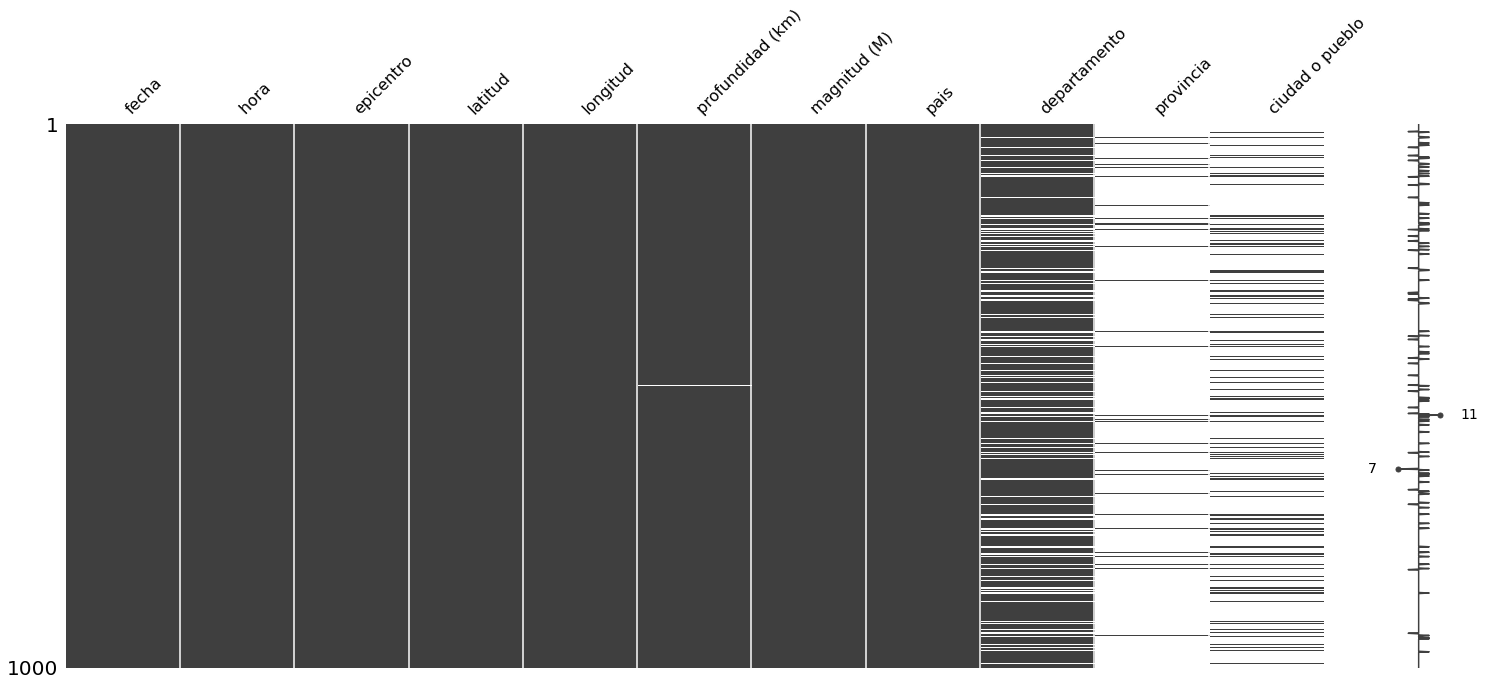

In [174]:
msno.matrix(df)

plt.show()

In [175]:
df['departamento'].value_counts()

Mar de Japón           763
臺灣省                     18
Сахалинская область     14
Приморский край          6
Камчатский край          2
黑龙江省                     2
辽宁省                      1
大阪府                      1
Name: departamento, dtype: int64

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fecha             1000 non-null   object 
 1   hora              1000 non-null   object 
 2   epicentro         1000 non-null   object 
 3   latitud           1000 non-null   float64
 4   longitud          1000 non-null   float64
 5   profundidad (km)  999 non-null    float64
 6   magnitud (M)      1000 non-null   float64
 7   pais              999 non-null    object 
 8   departamento      807 non-null    object 
 9   provincia         58 non-null     object 
 10  ciudad o pueblo   184 non-null    object 
dtypes: float64(4), object(7)
memory usage: 86.1+ KB


In [177]:
df['departamento'].unique()

array(['Mar de Japón', None, '臺灣省', '辽宁省', 'Сахалинская область',
       'Камчатский край', '黑龙江省', 'Приморский край', '大阪府'], dtype=object)

In [ ]:
mapa = folium.Map(location=[35.6895, 139.6917], zoom_start=5)  # Coordenadas aproximadas del centro de Japón

# Iterar sobre los registros del DataFrame y agregar marcadores al mapa
for index, row in df.iterrows():
    latitud = row['latitud']
    longitud = row['longitud']
    epicentro = row['epicentro']

    # Obtener la traducción del epicentro si está disponible, de lo contrario, usar el nombre original
    nombre_epicentro = traducciones.get(epicentro, epicentro)

    marcador = folium.Marker(location=[latitud, longitud], popup=nombre_epicentro)
    marcador.add_to(mapa)

# Mostrar el mapa
mapa

In [ ]:
df.describe()

,latitud,longitud,profundidad (km),magnitud (M)
count,1000.000000,1000.000000,999.000000,1000.000000
mean,35.787088,139.266697,98.557558,6.449200
std,7.442955,8.249472,155.200131,0.423673
min,4.476667,119.451667,0.000000,6.000000
25%,29.544167,135.487083,17.000000,6.100000
50%,37.306667,141.787500,38.000000,6.300000
75%,41.679583,143.742500,67.000000,6.600000
max,55.956667,158.505000,682.000000,9.000000


In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
df['epicentro'].value_counts()

Fuera de Sanriku                                     98
Cerca de Taiwán                                      66
Afuera de la prefectura de Fukushima                 60
Este de Hokkaido                                     41
Sureste de la isla Etorofu                           38
Afuera de la prefectura de Ibaraki                   38
Mar cerca de Torishima                               34
Islas Killil                                         32
Afuera de la prefectura de Miyagi                    32
Oeste de las islas Ogasawara                         29
Frente al este de la prefectura de Aomori            22
Mar cerca de la isla de Yonaguni                     20
Afuera de la prefectura de Iwate                     19
Fuera de Tokachi                                     18
Marina del este de la prefectura de Chiba            17
Frente a la costa de Iwo Jima                        16
Afuera del sureste de la península de Nemuro         15
Afuera de Kushiro                               

In [179]:
df.head()

,fecha,hora,epicentro,latitud,longitud,profundidad (km),magnitud (M),pais,departamento,provincia,ciudad o pueblo
0,2011/03/11,14:46:18.1,Fuera de Sanriku,38.103333,142.860000,24.0,9.0,Japón,Mar de Japón,None,None
1,2013/05/24,14:44:48.9,Mar de Ojotsk,54.891667,153.220000,598.0,8.3,Japón,Mar de Japón,None,None
2,2007/01/13,13:23:13.0,Este de las islas Kuriles,46.936667,155.051667,30.0,8.2,Japón,Mar de Japón,None,None
3,1994/10/04,22:22:56.9,Este de Hokkaido,43.375000,147.673333,28.0,8.2,Japón,Mar de Japón,None,None
4,2015/05/30,20:23:02.2,Oeste de las islas Ogasawara,27.860000,140.681667,682.0,8.1,Japón,Mar de Japón,None,None


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   fecha                      1000 non-null   object 
 1   hora                       1000 non-null   object 
 2   epicentro                  1000 non-null   object 
 3   latitud                    1000 non-null   float64
 4   longitud                   1000 non-null   float64
 5   profundidad (km)           999 non-null    float64
 6   magnitud (M)               1000 non-null   float64
 7   máxima intensidad sísmica  1000 non-null   object 
 8   ciudad                     1000 non-null   object 
dtypes: float64(4), object(5)
memory usage: 70.4+ KB


In [181]:
df["fecha"] = pd.to_datetime(df["fecha"], dayfirst=True)

In [182]:
por_año = df.groupby(df["fecha"].dt.year).size()

In [183]:
df["año"] = df["fecha"].dt.year

In [184]:
df.head()

,fecha,hora,epicentro,latitud,longitud,profundidad (km),magnitud (M),pais,departamento,provincia,ciudad o pueblo,año
0,2011-03-11,14:46:18.1,Fuera de Sanriku,38.103333,142.860000,24.0,9.0,Japón,Mar de Japón,None,None,2011
1,2013-05-24,14:44:48.9,Mar de Ojotsk,54.891667,153.220000,598.0,8.3,Japón,Mar de Japón,None,None,2013
2,2007-01-13,13:23:13.0,Este de las islas Kuriles,46.936667,155.051667,30.0,8.2,Japón,Mar de Japón,None,None,2007
3,1994-10-04,22:22:56.9,Este de Hokkaido,43.375000,147.673333,28.0,8.2,Japón,Mar de Japón,None,None,1994
4,2015-05-30,20:23:02.2,Oeste de las islas Ogasawara,27.860000,140.681667,682.0,8.1,Japón,Mar de Japón,None,None,2015


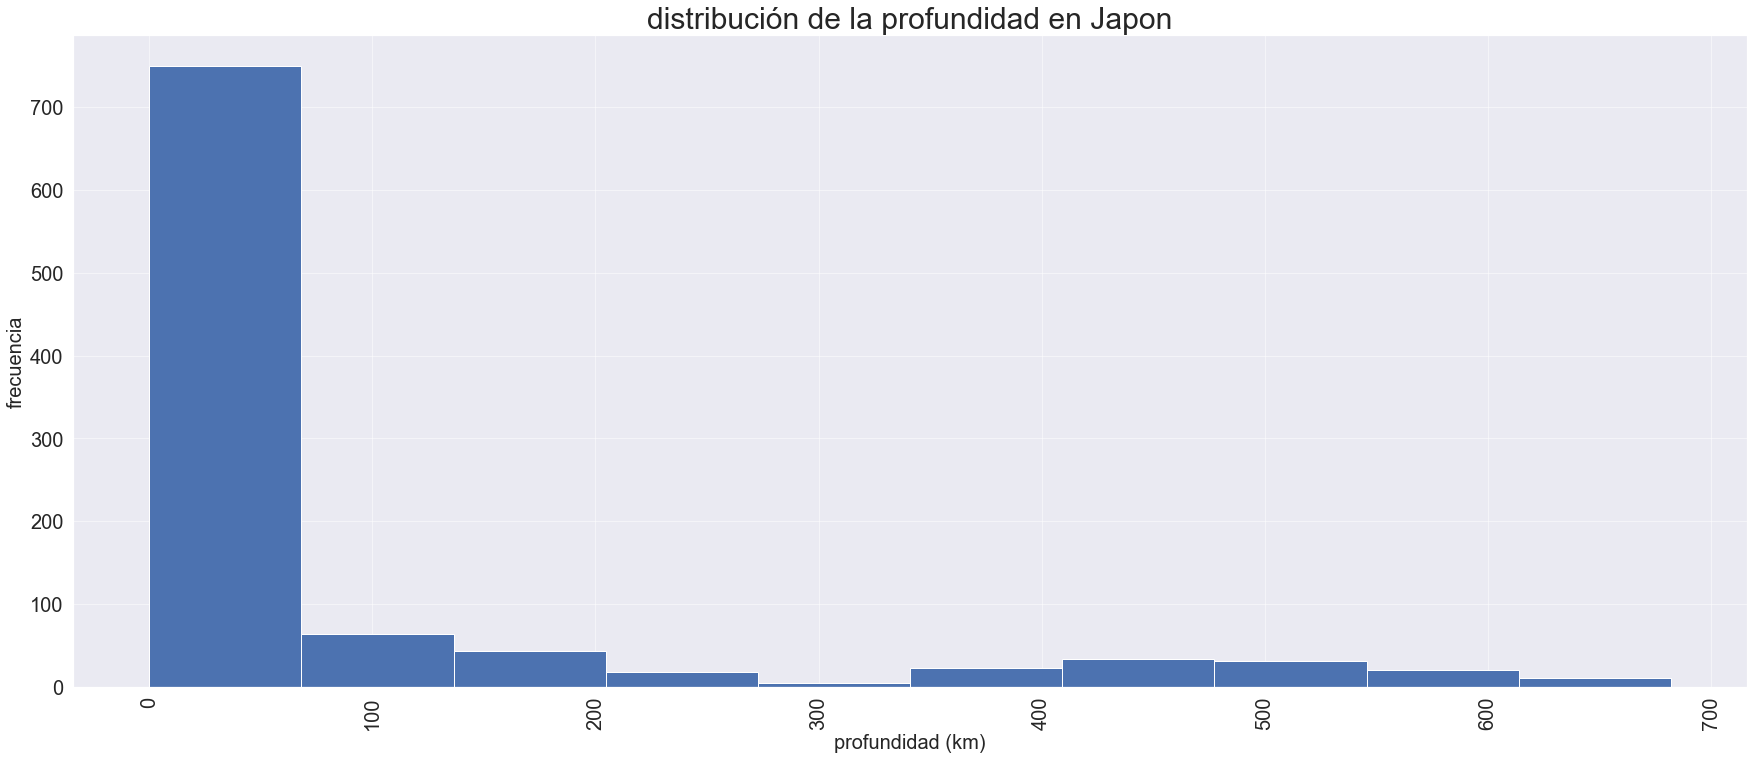

In [ ]:
plt.figure(figsize=(30, 12))
df_sorted = df.sort_values('profundidad (km)', ascending=False)
sns.histplot(data=df_sorted, x='profundidad (km)', color='steelblue', bins=20)
plt.hist(df_sorted['profundidad (km)'])
plt.xlabel('profundidad (km)', fontsize=20)
plt.ylabel('frecuencia', fontsize=20)
plt.title('distribución de la profundidad en Japon', fontsize=30)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True, alpha=0.5)

plt.show()

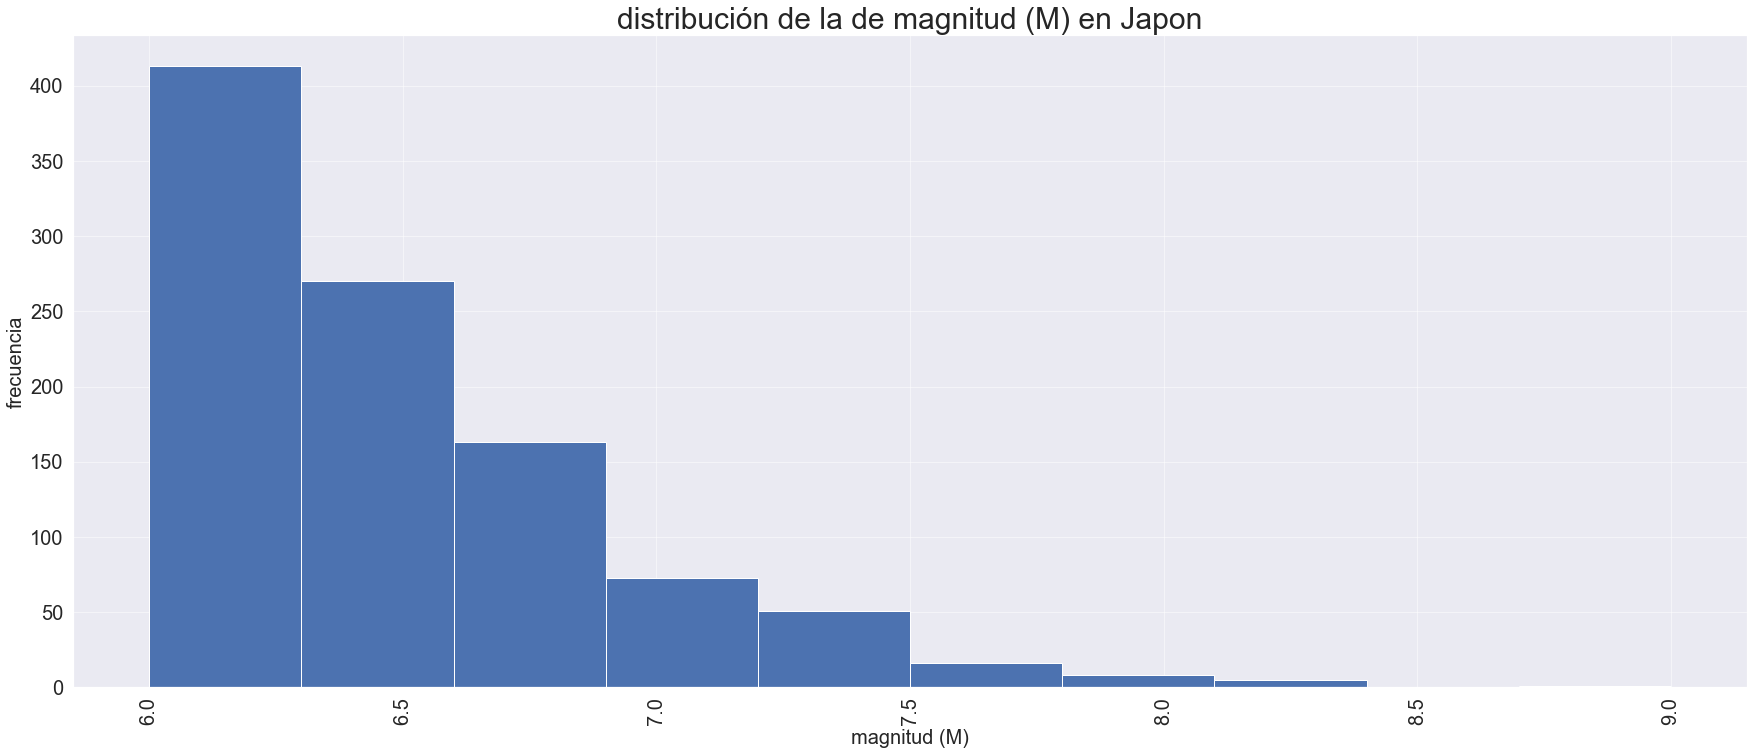

In [ ]:
plt.figure(figsize=(30, 12))
df_sorted = df.sort_values('magnitud (M)', ascending=False)
sns.histplot(data=df_sorted, x='magnitud (M)', color='steelblue', bins=20)
plt.hist(df_sorted['magnitud (M)'])
plt.xlabel('magnitud (M)', fontsize=20)
plt.ylabel('frecuencia', fontsize=20)
plt.title('distribución de la de magnitud (M) en Japon', fontsize=30)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True, alpha=0.5)

plt.show()

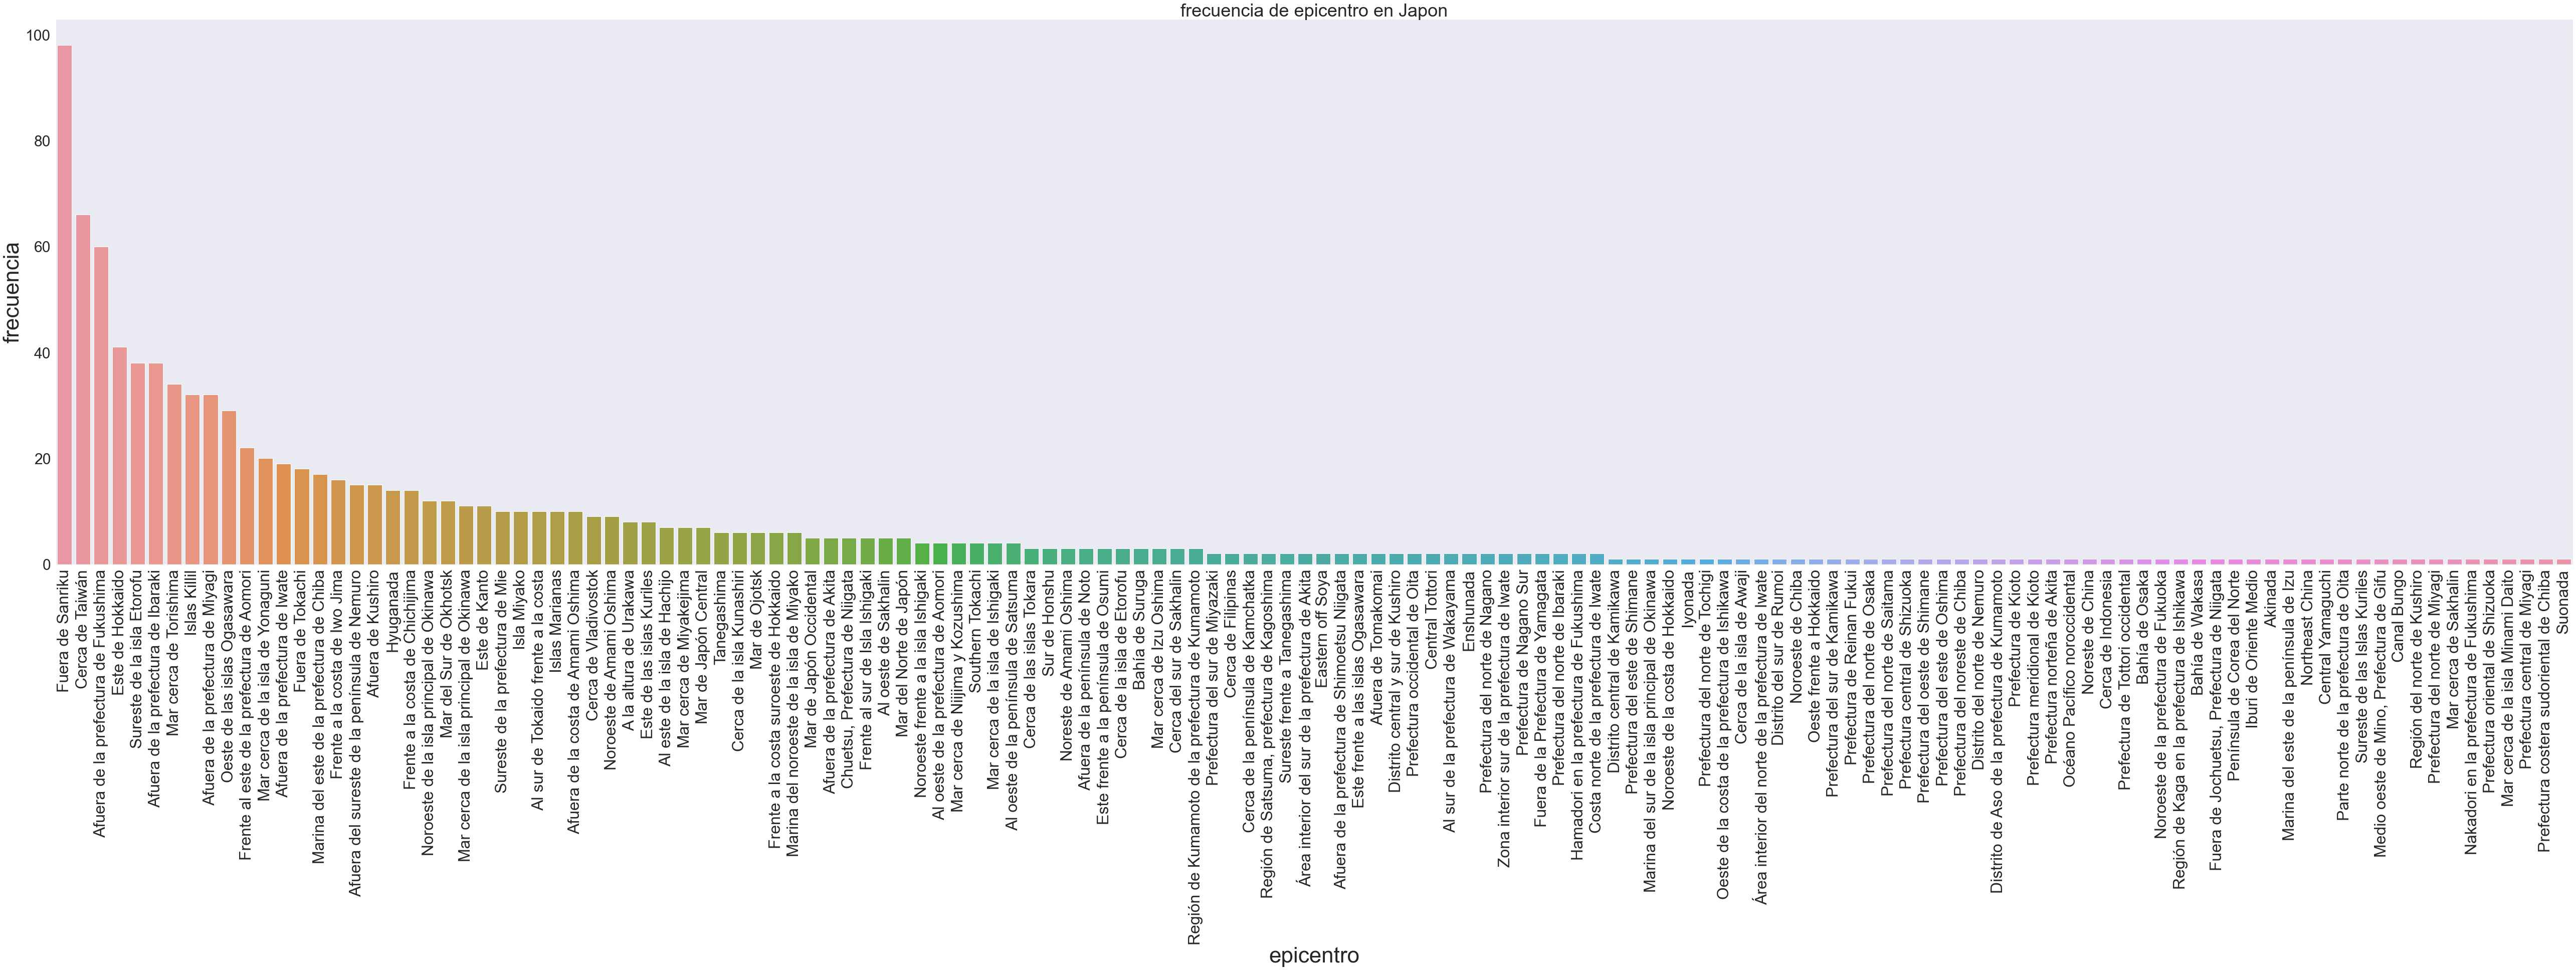

In [ ]:
order = df['epicentro'].value_counts().index


plt.figure(figsize=(90, 20))
sns.countplot(data=df, x='epicentro', order=order)
plt.xticks(rotation=90, fontsize=32)
plt.xlabel('epicentro', fontsize=44)
plt.ylabel('frecuencia', fontsize=44)
plt.yticks(fontsize=30)
plt.title('frecuencia de epicentro en Japon', fontsize=36)

plt.show()




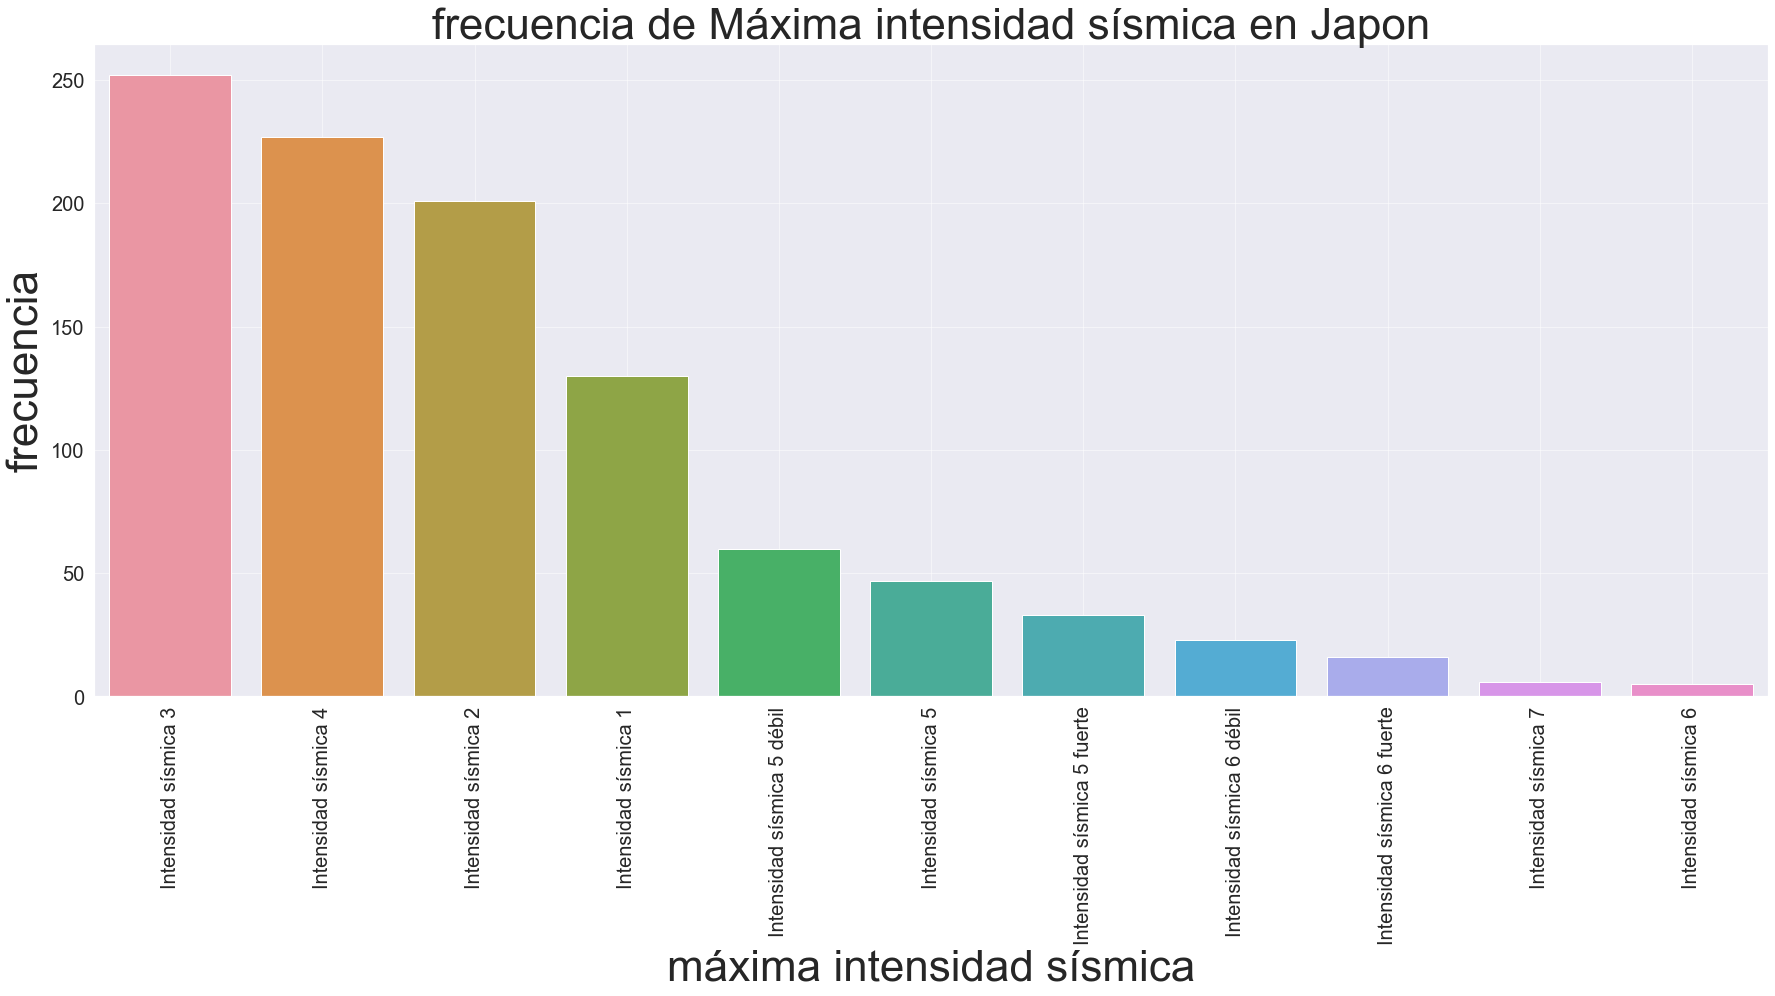

In [ ]:
order = df['máxima intensidad sísmica'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(30, 12))
sns.countplot(data=df, x='máxima intensidad sísmica', order=order)
plt.xticks(rotation=90)
plt.xlabel('máxima intensidad sísmica', fontsize=44)
plt.ylabel('frecuencia', fontsize=44)
plt.title('frecuencia de Máxima intensidad sísmica en Japon', fontsize=44)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True, alpha=0.5)
plt.show()

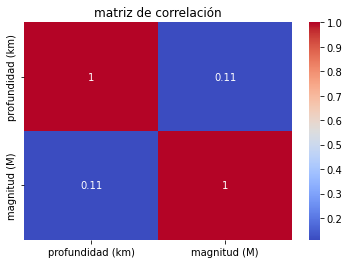

In [ ]:
# Relaciones entre variables
correlation_matrix = df[['profundidad (km)', 'magnitud (M)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('matriz de correlación')
plt.show()

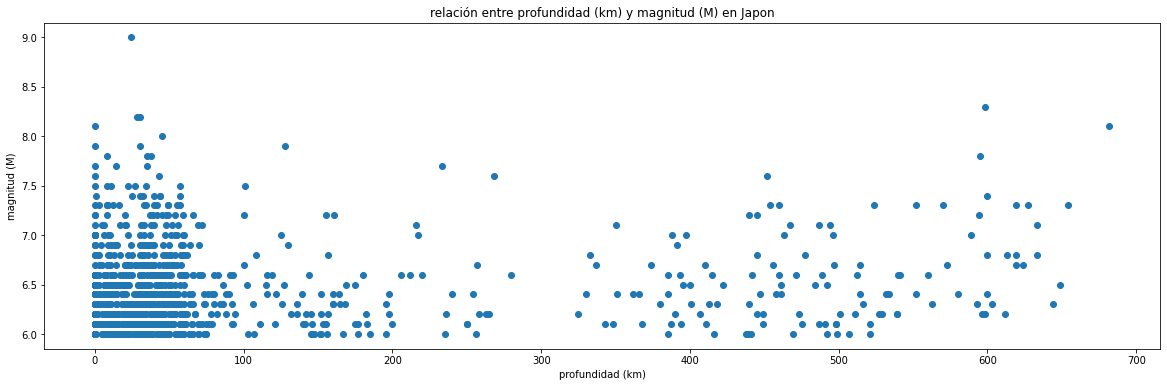

In [ ]:
plt.figure(figsize=(20, 6))
plt.scatter(df['profundidad (km)'], df['magnitud (M)'])
plt.xlabel('profundidad (km)')
plt.ylabel('magnitud (M)')
plt.title('relación entre profundidad (km) y magnitud (M) en Japon')
plt.show()

<Figure size 2160x864 with 0 Axes>

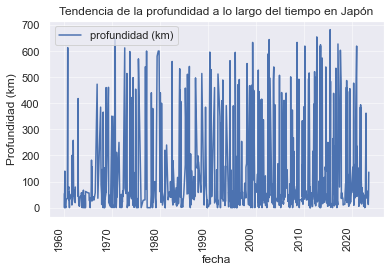

In [ ]:
df['fecha'] = pd.to_datetime(df['fecha'])
df['hora '] = pd.to_datetime(df['hora '])



plt.figure(figsize=(30, 12))
df.plot(x='fecha', y='profundidad (km)', kind='line')  

plt.xlabel('fecha')
plt.ylabel('Profundidad (km)')
plt.title('Tendencia de la profundidad a lo largo del tiempo en Japón')
plt.xticks(rotation=90, )

plt.grid(True, alpha=0.5)
plt.show()

<Figure size 864x432 with 0 Axes>

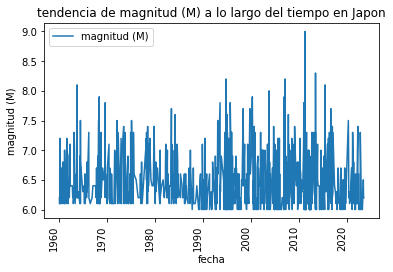

In [ ]:
plt.figure(figsize=(12, 6))
df.plot(x='fecha', y='magnitud (M)', kind='line')
plt.xlabel('fecha')
plt.ylabel('magnitud (M)')
plt.title('tendencia de magnitud (M) a lo largo del tiempo en Japon')
plt.xticks(rotation='vertical')
plt.show()

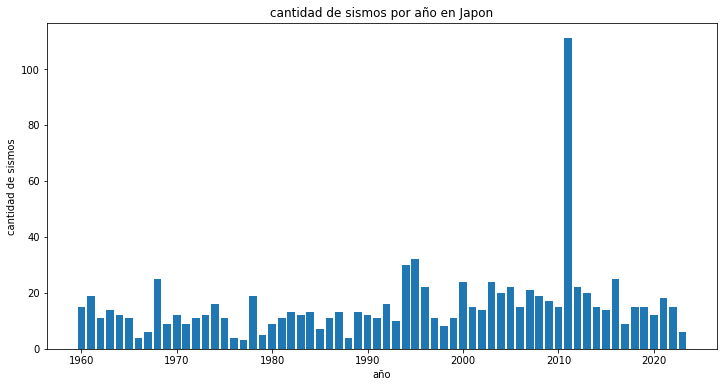

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(por_año.index, por_año.values)
plt.xlabel("año")
plt.ylabel("cantidad de sismos")
plt.title("cantidad de sismos por año en Japon")
plt.show()

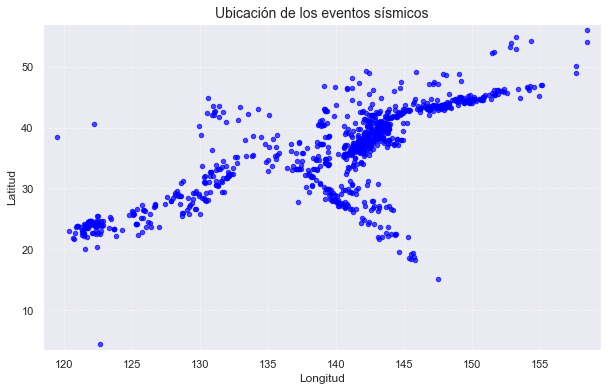

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(df['longitud'], df['latitud'], s=20, c='blue', alpha=0.7)
plt.xlabel('Longitud', fontsize=12)
plt.ylabel('Latitud', fontsize=12)
plt.title('Ubicación de los eventos sísmicos', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(df['longitud'].min() - 1, df['longitud'].max() + 1)
plt.ylim(df['latitud'].min() - 1, df['latitud'].max() + 1)
plt.show()

In [ ]:
filtro = df['epicentro'] == 'Afuera de la costa de Amami Oshima' 
fila_especifica = df.loc[filtro]

In [ ]:
df.head()

,fecha,hora,epicentro,latitud,longitud,profundidad (km),magnitud (M),máxima intensidad sísmica,ciudad,año
0,2011-03-11,2023-07-03 14:46:18.100,Fuera de Sanriku,38.103333,142.860000,24.0,9.0,Intensidad sísmica 7,<NA>,2011
1,2013-05-24,2023-07-03 14:44:48.900,Mar de Ojotsk,54.891667,153.220000,598.0,8.3,Intensidad sísmica 3,<NA>,2013
2,2007-01-13,2023-07-03 13:23:13.000,Este de las islas Kuriles,46.936667,155.051667,30.0,8.2,Intensidad sísmica 3,<NA>,2007
3,1994-10-04,2023-07-03 22:22:56.900,Este de Hokkaido,43.375000,147.673333,28.0,8.2,Intensidad sísmica 6,<NA>,1994
4,2015-05-30,2023-07-03 20:23:02.200,Oeste de las islas Ogasawara,27.860000,140.681667,682.0,8.1,Intensidad sísmica 5 fuerte,<NA>,2015


In [ ]:
fila_especifica

,fecha,hora,epicentro,latitud,longitud,profundidad (km),magnitud (M),máxima intensidad sísmica,ciudad,año
140,1995-10-18,2023-07-03 19:37:23.200,Afuera de la costa de Amami Oshima,28.031667,130.380000,39.0,6.9,Intensidad sísmica 5,<NA>,1995
217,1995-10-19,2023-07-03 11:41:33.000,Afuera de la costa de Amami Oshima,28.018333,130.438333,21.0,6.7,Intensidad sísmica 5,<NA>,1995
360,1995-10-19,2023-07-03 09:32:03.500,Afuera de la costa de Amami Oshima,28.130000,130.370000,41.0,6.5,Intensidad sísmica 4,<NA>,1995
653,1997-01-18,2023-07-03 00:53:13.900,Afuera de la costa de Amami Oshima,28.808333,129.928333,37.0,6.2,Intensidad sísmica 4,Ciudad de Amami,1997
820,1986-03-24,2023-07-03 11:01:28.500,Afuera de la costa de Amami Oshima,28.511667,130.261667,18.0,6.1,Intensidad sísmica 4,<NA>,1986
852,1970-01-01,2023-07-03 04:01:51.600,Afuera de la costa de Amami Oshima,28.491667,129.095000,0.0,6.1,Intensidad sísmica 5,<NA>,1970
880,2022-12-13,2023-07-03 23:25:20.300,Afuera de la costa de Amami Oshima,27.600000,129.413333,37.0,6.0,Intensidad sísmica 4,<NA>,2022
934,2006-11-18,2023-07-03 03:03:12.000,Afuera de la costa de Amami Oshima,28.516667,130.153333,30.0,6.0,Intensidad sísmica 4,<NA>,2006
956,2001-12-09,2023-07-03 05:29:34.500,Afuera de la costa de Amami Oshima,28.248333,129.488333,36.0,6.0,Intensidad sísmica 5 fuerte,Ciudad de Amami,2001
971,1995-10-19,2023-07-03 08:25:55.900,Afuera de la costa de Amami Oshima,28.063333,130.571667,37.0,6.0,Intensidad sísmica 4,<NA>,1995
